In [1]:
#Importing necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from math import sqrt
import cv2 as cv
from collections import Counter

In [2]:
#Assigning the path to training images:
path=r'C:\Users\Arqam Nisar\Training set'
Dogs = glob.glob(os.path.join(path , 'Dogs'+'//*.*'))
Lions = glob.glob(os.path.join(path , 'Lions'+'//*.*'))

In [3]:
#Length of folder Lions:
len(Lions)

10

In [4]:
#Making a matrix of Data with Dogs and Lions Images:
Data=[Dogs,Lions]

In [5]:
#A function for reading the labels and assigning the data to a variable as well.
#Converting the images to Grayscale as well
def Reading_labeling(Data):
    data = []
    labels = []
    count=0
    for i in Data:
        count=count+1
        for j in i:
            image=cv.imread(j, cv.IMREAD_GRAYSCALE)
            new_image = cv.resize(image, (32,32))
            data.append(new_image)
            if count==1:
                labels.append(0)
            elif count==2:
                labels.append(1)
    return data, labels

In [6]:
#Declaring variables for data and labels:
data, labels=Reading_labeling(Data)

In [7]:
#Converting the data into arrays and normalizing it between the range 0 and 1:
data = np.array(data)
data = data / 255

#Converting the data to a list so that we can use it as a dictionary:
data = data.tolist()

In [8]:
#Labels of 20 Images:
labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [9]:
#Making dictionary of our dataset:
for i in range(0, len(data)):
    data[i] = {"label": labels[i], "image": data[i]}

In [10]:
#shuffle function for random data:
from random import shuffle
shuffle(data)

In [11]:
#Splitting the data into training and testing data:
training_data = data[0:15]
testing_data = data[15:20]

In [12]:
#Function for Calculating Euclidean distance:
#Use algo as 'euclidean' for finding output based on Euclidean distance and
#Use algo as 'manhattan' for finding output based on Manhattan distance.
def imageDiff(img1, img2, algo):
    temp = 0
    for i in range(0, len(img1['image'])):
        for j in range(0, len(img1['image'][0])):
            if algo == 'euclidean':
                temp += ((img1['image'][i][j] - img2['image'][i][j]) ** 2)
            if algo == 'manhattan':
                temp +=(img1['image'][i][j] - img2['image'][i][j])
    if algo == 'euclidean':
        return temp ** 0.5
    if algo == 'manhattan':
        return temp

In [13]:
#Checking our Distance function for first training image which would give us zero difference:
imageDiff(training_data[0], training_data[0], 'manhattan')

0.0

In [14]:
#Checking our Distance function by testing first image from testing_data against all training data as:
dist = []
for i in range(0, len(training_data)):
    dist.append({'dist': imageDiff(testing_data[0], training_data[i], 'manhattan'), 'label': training_data[i]['label']})

In [15]:
#The distances of test sample with all training samples shown along with their features:
dist

[{'dist': 36.92941176470588, 'label': 1},
 {'dist': 228.764705882353, 'label': 1},
 {'dist': -152.21568627450938, 'label': 1},
 {'dist': -159.81960784313733, 'label': 0},
 {'dist': 146.87058823529404, 'label': 0},
 {'dist': -89.36078431372522, 'label': 0},
 {'dist': 312.3921568627449, 'label': 1},
 {'dist': -139.9882352941176, 'label': 0},
 {'dist': 55.58823529411771, 'label': 0},
 {'dist': 267.18431372549003, 'label': 1},
 {'dist': -5.11764705882351, 'label': 1},
 {'dist': 131.91372549019619, 'label': 0},
 {'dist': -127.92941176470593, 'label': 0},
 {'dist': -73.72549019607871, 'label': 1},
 {'dist': 47.42352941176471, 'label': 1}]

In [16]:
#A function for predicting the label of the test sample or image we give to the model:
import math
def predictImageLabel(image, k):
    dist = []
    for i in range(0, len(training_data)):
        dist.append({'dist': imageDiff(image, training_data[i], 'euclidean'), 'label': training_data[i]['label']})
    dist = sorted(dist, key=lambda x: x['dist'])
    knn = dist[0:k]
    label1 = 0
    label2 = 0
    for i in range(0, len(knn)):
        if knn[i]['label'] == 0:
            label1 += 1
        if knn[i]['label'] == 1:
            label2 += 1
    if label1 > label2:
        return 0
    if label2 > label1:
        return 1

original: 0 -- predicted: 0
original: 1 -- predicted: 0
original: 0 -- predicted: 0
original: 0 -- predicted: 0
original: 1 -- predicted: 1


C:\Users\Arqam Nisar\AppData\Local\Temp\ipykernel_13500\588969770.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'KNN Results')

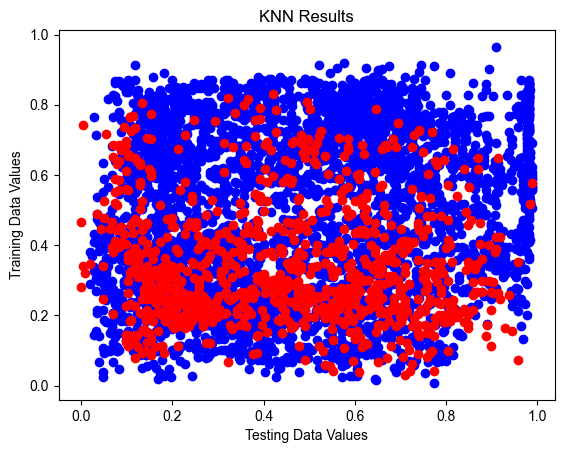

In [17]:
#Implementing the predictImageLabel function to get the predicted values against the original values:
#And plotting the data points associated with label(0) as blue and label(1) as red
predicted = []
for i in range(0, len(testing_data)):
    pred = predictImageLabel(testing_data[i], 3)
    predicted.append({'label': pred})
    print('original: {0} -- predicted: {1}'.format(testing_data[i]['label'], pred))
    if predicted[i]['label'] == 0:
        plt.scatter(testing_data[i]['image'],training_data[i]['image'], color = 'blue')
    if predicted[i]['label'] == 1:
        plt.scatter(testing_data[i]['image'],training_data[i]['image'], color = 'red')
plt.style.use('seaborn')
plt.xlabel('Testing Data Values')
plt.ylabel('Training Data Values')
plt.title('KNN Results')

In [18]:
#Accuracy function for finding out the accuracy of the algorithm:
def accuracy(original, predicted):
    total = len(original)
    count = 0
    for i in range(0, len(original)):
        if original[i]['label'] == predicted[i]['label']:
            count += 1
    return '{0}%'.format((count / total) * 100)

In [19]:
#Accuracy:
accuracy(testing_data, predicted)

'80.0%'